<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/Uso_de_R_en_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [3]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [6]:
library(ggplot2)

In [7]:
library(mlbench)

In [9]:
library(parallel)
detectCores(all.tests = FALSE, logical=TRUE)

[1] 2

In [10]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

In [12]:
#importing libraries
library(mlbench) # contiene muchas datasets (especialmente el de Boston Housing dataset)
library(caret) # paquete para algoritmos de machine learning / CARET tiene para entrenamiento de clasificacion y regresion

In [13]:
# importing the Boston Housing data set
data(BostonHousing)
head(BostonHousing)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [14]:
# Reviso para ver si falta algun registros
sum(is.na(BostonHousing))

[1] 0

In [15]:
# Para lograr un modelo reproducible; configuramos una semilla
set.seed(100)

In [20]:
# Performs stratified random split of the data set
TrainingIndex=createDataPartition(BostonHousing$medv, p=0.8, list=FALSE)
TrainingSet= BostonHousing[TrainingIndex,] # Set de entrenamiento
TestingSet=BostonHousing[-TrainingIndex,] # Set de testing

In [22]:
# Construyo el modelo de entrenamiento
Model = train(medv~.,data=TrainingSet,
              method="lm",
              na.action=na.omit,
              preProcess=c('scale','center'),
              trControl=trainControl(method='none')
)


In [23]:
# Aplico el modelo para prediccion
Model.training=predict(Model, TrainingSet) # Aplico modelo para hacer predicciones sobre el Set de Entrenamiento
Model.testing=predict(Model, TestingSet) # Aplico modelo para hacer predicciones sobre el Set de Prueba

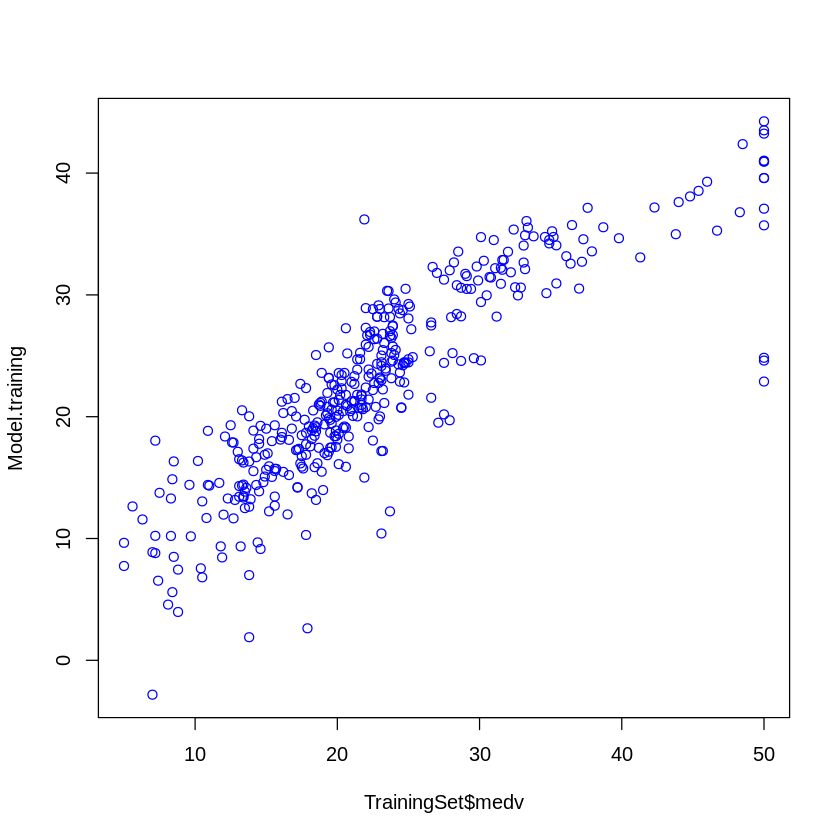

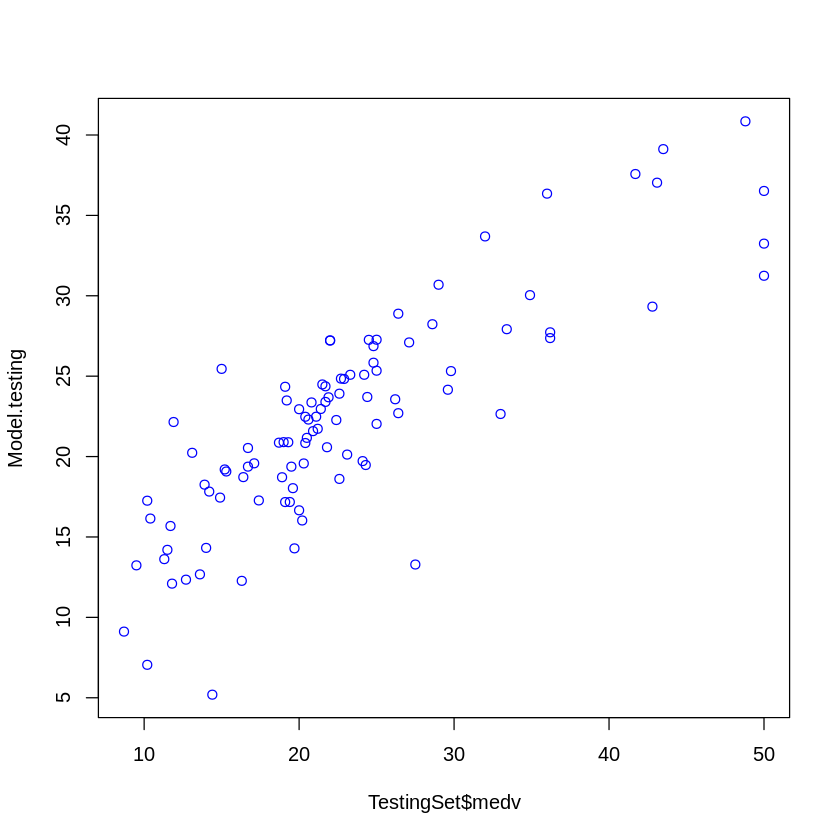

In [24]:
# Model Performance (Displays scatter plot and performance metrics)
  # Scatter plot of Training set
  plot(TrainingSet$medv,Model.training,col='blue')
  plot(TestingSet$medv,Model.testing,col='blue')